<a href="https://colab.research.google.com/github/lennythecreator/AI-Model/blob/main/AI4ALL_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Identifying Factors that contribute to gentrification

##Exploring our data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = "/content/drive/Shareddrives/AI4ALL/Cleaned Data Set - People - Cleaned.csv"
data2 = "/content/drive/Shareddrives/AI4ALL/Cleaned Data Set - House - Cleaned.csv"

data3= "/content/drive/Shareddrives/AI4ALL/ahs2021m.csv"

merged_data = "/content/drive/Shareddrives/AI4ALL/Merged Data Set - Cleaned.csv"


data_set = pd.read_csv(data)
data_set2 = pd.read_csv(data2)

#merged_data = pd.merge(data_set,data_set2)
#merged_data
data_set


,HHAGE,HHOLDKIDS,HHYNGKIDS,HHGRAD,HHMAR,HINCP,HHNATVTY,HHSEX,SAMESEXHH,HHRACE,HHCITSHP
0,74,0,0,47,1,74030,57,1,2,1,1
1,55,0,0,44,1,147000,57,1,2,1,1
2,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
3,80,0,0,39,3,1920,57,2,2,1,1
4,60,0,0,45,1,129000,57,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
64136,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
64137,44,0,0,39,1,125000,57,2,1,1,1
64138,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
64139,23,0,0,44,6,0,57,1,2,1,1


In [3]:
data_set2 = pd.read_csv(data2)
data_set2.head(10)

,VACANCY,FS,YRBUILT,REMODAMT,BLD,TENURE,DBMISSRENT,DBUTBILL
0,-6,2,1970,19900,2,1,-6,4
1,-6,2,1960,15100,2,1,-6,4
2,10,-6,1970,-6,2,-6,-6,-6
3,-6,1,1970,-6,2,2,5,4
4,-6,2,1980,3650,2,1,-6,4
5,-6,2,1980,750,2,1,-6,4
6,7,-6,1950,-6,3,-6,-6,-6
7,6,-6,1980,-6,2,-6,-6,-6
8,-6,-6,1990,300,2,1,-6,4
9,-6,2,1990,-6,6,2,1,2


In [4]:
merged_dataset = pd.read_csv(merged_data)
merged_dataset

,HHAGE,HHOLDKIDS,HHYNGKIDS,HHGRAD,HHMAR,HINCP,HHNATVTY,HHSEX,SAMESEXHH,HHRACE,...,VACANCY,FS,YRBUILT,REMODAMT,BLD,TENURE,DBMISSRENT,RMJOB,RMHOME,DBUTBILL
0,74,0,0,47,1,74030,57,1,2,1,...,-6,2,1970,19900,2,1,-6,-6,-6,4
1,55,0,0,44,1,147000,57,1,2,1,...,-6,2,1960,15100,2,1,-6,-6,-6,4
2,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,10,-6,1970,-6,2,-6,-6,-6,-6,-6
3,80,0,0,39,3,1920,57,2,2,1,...,-6,1,1970,-6,2,2,5,-6,-6,4
4,60,0,0,45,1,129000,57,1,2,1,...,-6,2,1980,3650,2,1,-6,-6,-6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64136,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,10,-6,2020,-6,2,-6,-6,-6,-6,-6
64137,44,0,0,39,1,125000,57,2,1,1,...,-6,-6,2019,24600,2,1,-6,2,1,4
64138,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,3,-6,2017,-6,2,-6,-6,-6,-6,-6
64139,23,0,0,44,6,0,57,1,2,1,...,-6,2,1950,-6,9,2,5,2,2,4


In [5]:
data_set.columns

Index(['HHAGE', 'HHOLDKIDS', 'HHYNGKIDS', 'HHGRAD', 'HHMAR', 'HINCP',
       'HHNATVTY', 'HHSEX', 'SAMESEXHH', 'HHRACE', 'HHCITSHP'],
      dtype='object')

In [6]:
data_set2.columns

Index(['VACANCY', 'FS', 'YRBUILT', 'REMODAMT', 'BLD', 'TENURE', 'DBMISSRENT',
       'DBUTBILL'],
      dtype='object')

In [7]:
merged_dataset.columns

Index(['HHAGE', 'HHOLDKIDS', 'HHYNGKIDS', 'HHGRAD', 'HHMAR', 'HINCP',
       'HHNATVTY', 'HHSEX', 'SAMESEXHH', 'HHRACE', 'HHCITSHP', 'RMHOOD',
       'HRATE', 'NRATE', 'SEARCHAPRJ', 'SEARCHCRED', 'ROACH', 'ROACH.1',
       'RODENT', 'VACANCY', 'FS', 'YRBUILT', 'REMODAMT', 'BLD', 'TENURE',
       'DBMISSRENT', 'RMJOB', 'RMHOME', 'DBUTBILL'],
      dtype='object')

# Feature Engineering

In [8]:
median_age = merged_dataset['HHAGE'].median()
indices = merged_dataset['HHAGE'] < 0

# Replace values less than 0 with the mean age
merged_dataset.loc[indices, 'HHAGE'] = median_age
median_age

merged_dataset['HHAGE'].value_counts()


HHAGE
50    9155
80    2140
85    1983
65    1151
60    1148
      ... 
19      86
18      32
17       5
15       5
16       4
Name: count, Length: 67, dtype: int64

<Axes: xlabel='HHAGE', ylabel='Count'>

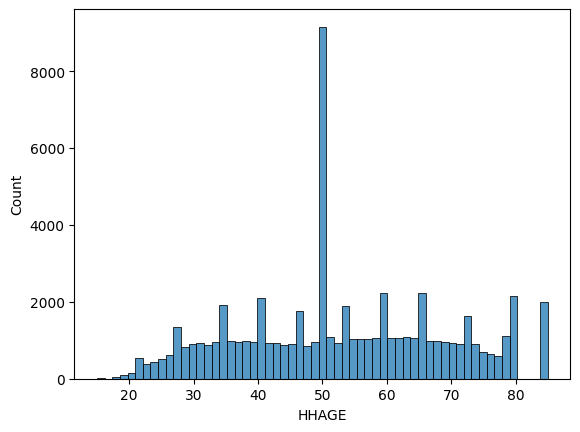

In [9]:
sns.histplot(merged_dataset['HHAGE'])

In [10]:
# Catagory to define gentrification
# Housing units are defined to be gentrified if property renovations are completed or if members of a
# household recently moved to the neighborhood with reports of moving for better jobs, homes, or neighborhoods.

merged_dataset['Gentrification_Label'] = 0

gentrified_specifications = (
    (merged_dataset['REMODAMT'] > 0) |                                      # REMODAMT - Total cost of home improvement jobs in last two years
    (merged_dataset['RMHOOD'] == 1) |                                       # Flag indicating respondent, who moved in last two years, moved to be in more desirable neighborhood
    (merged_dataset['RMJOB'] == 1) |                                        # Flag indicating respondent, who moved in last two years, moved for job
    (merged_dataset['RMHOME'] == 1) |                                       # Flag indicating respondent, who moved in last two years, moved for better home
    (merged_dataset['HRATE'] == 1) &                                        # Rating of current home
    ((merged_dataset['NRATE'] == 1) | merged_dataset['NRATE'] == 3)         # Rating of current neighborhood
)

merged_dataset.loc[gentrified_specifications, 'Gentrification_Label'] = 1

merged_dataset['Gentrification_Label'].value_counts()



Gentrification_Label
0    40328
1    23813
Name: count, dtype: int64

#Building the Model

In [11]:
# Define features (X) and target variable (y)
X = merged_dataset[['HHAGE', 'HHOLDKIDS', 'HHYNGKIDS', 'HHGRAD', 'HHMAR', 'HINCP',
                    'HHNATVTY', 'HHSEX', 'SAMESEXHH', 'HHRACE', 'HHCITSHP', 'RMHOOD',
                    'HRATE', 'NRATE', 'SEARCHAPRJ', 'SEARCHCRED', 'ROACH', 'ROACH.1',
                    'RODENT', 'VACANCY', 'FS', 'YRBUILT', 'REMODAMT', 'BLD', 'TENURE',
                    'DBMISSRENT', 'RMJOB', 'RMHOME', 'DBUTBILL']]

y = merged_dataset['Gentrification_Label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape) # 51,312
print("Testing set shape:", X_test.shape, y_test.shape)    # 12,829


# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Training set shape: (51312, 29) (51312,)
Testing set shape: (12829, 29) (12829,)
Accuracy: 0.9299243900537844
Precision: 0.8838158150378862
Recall: 0.9379381443298969
F1 Score: 0.9100730219065719
Confusion Matrix:
 [[7381  598]
 [ 301 4549]]


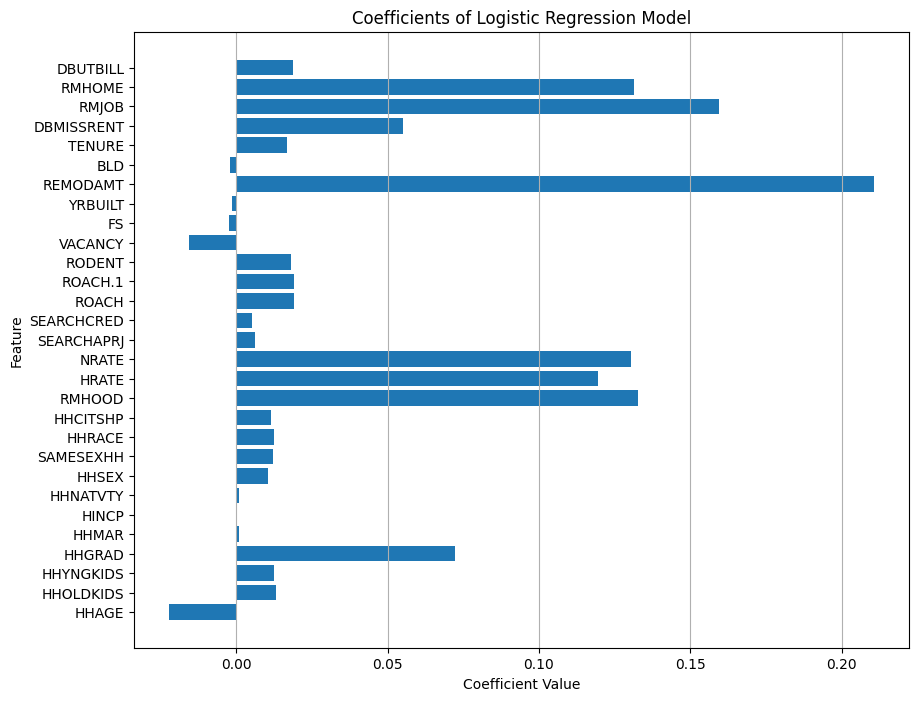

In [12]:
# Extract coefficients and feature names
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Create a horizontal bar plot for coefficients
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.grid(axis='x')
plt.show()

#  Positive coefficients indicate factors that increase the likelihood of gentrification, while negative coefficients indicate factors that decrease the likelihood.

In [13]:
# input features and target variable
X = merged_dataset.drop(columns=['HHAGE', 'HHGRAD'])  # Input features
y1 = merged_dataset['HHAGE']  # Target variable
y2 = merged_dataset['HHGRAD']


# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2,  test_size=0.2, random_state=42)

# Initialize and train a linear regression model
age_model = LinearRegression()
age_model.fit(X_train, y1_train)

grad_model = LinearRegression()
grad_model.fit(X_train,y2_train)

# predictions on our testing set
y1_pred = age_model.predict(X_test)
y2_pred = grad_model.predict(X_test)



# Evaluation for age model
mse = mean_squared_error(y1_test, y1_pred)
print('Mean Squared Error:', mse)



Mean Squared Error: 158.3743304587127


In [14]:
# Evaluation for gradutation model
mse = mean_squared_error(y2_test, y2_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 7.40361608762136


#Making Predictions

In [15]:
predictions_df = pd.DataFrame({'Actual Age': y1_test, 'Predicted Age': y1_pred, 'Actual Grad':y2_test,'Predicted Grad': y2_test})
predictions_df


,Actual Age,Predicted Age,Actual Grad,Predicted Grad
52001,45,65.491955,40,40
10643,32,62.365834,34,34
58934,74,54.334370,37,37
56743,54,51.493684,44,44
21317,31,41.080967,44,44
...,...,...,...,...
8191,34,51.334160,45,45
16180,60,58.975734,42,42
57237,27,44.685443,40,40
16889,49,51.474156,40,40


In [16]:
predictions_df['Predicted Age'].mean()

52.84520558216692

<Axes: xlabel='Actual Age', ylabel='Predicted Age'>

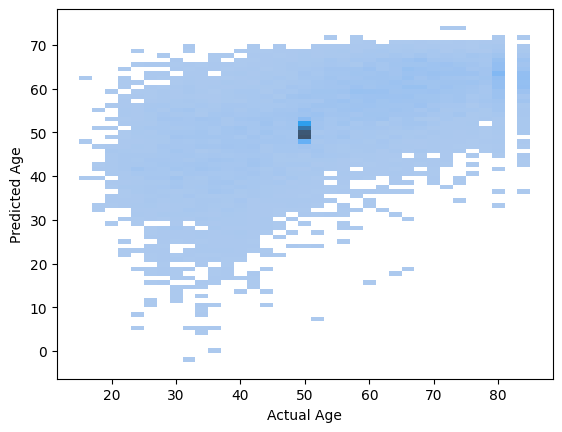

In [17]:
sns.histplot(predictions_df, x=predictions_df['Actual Age'], y=predictions_df['Predicted Age'])

#Data about Tenure
## identifying what percent of the status of units owned or rented

In [18]:
data_set2['TENURE'].value_counts()

TENURE
 1    31669
 2    23682
-6     8083
 3      707
Name: count, dtype: int64

In [19]:
owned_by_someone_in_household = (31669/len(data_set2['TENURE']))*100
rented = (23682/len(data_set2['TENURE']))*100
occupied_without_rent = (8083/len(data_set2['TENURE']))*100
n_a = (707/len(data_set2['TENURE']))*100
print(f"Status owned: {owned_by_someone_in_household}% , rented: {rented}%, Occupied without rent: {occupied_without_rent}%, n/a: {n_a}%")


Status owned: 49.37403532841708% , rented: 36.921781699692865%, Occupied without rent: 12.60192388643769%, n/a: 1.1022590854523628%


In [20]:
data_set2['DBMISSRENT'].value_counts()

DBMISSRENT
-6    40459
 5    21244
 1      685
 3      677
-9      621
 2      406
 4       49
Name: count, dtype: int64

<Axes: xlabel='DBMISSRENT', ylabel='Count'>

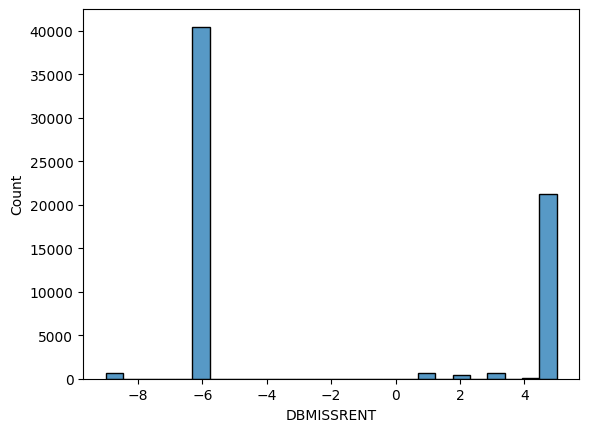

In [21]:
sns.histplot(data_set2['DBMISSRENT'])

#House Hold Gender

In [22]:
data_set['HHSEX'].value_counts()

HHSEX
 2    28667
 1    27391
-6     8083
Name: count, dtype: int64

<Axes: xlabel='HHSEX', ylabel='Count'>

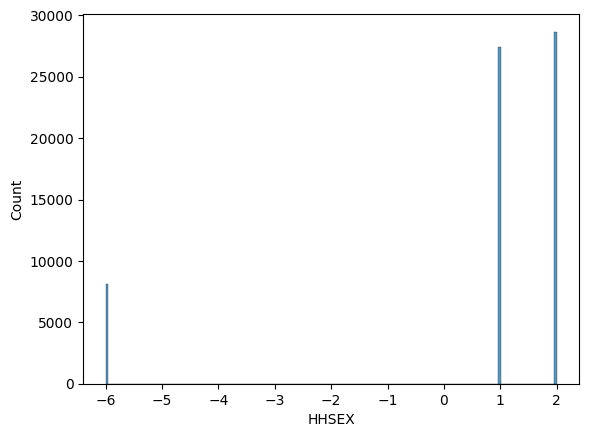

In [23]:
sns.histplot(data_set['HHSEX'])

#Age Feature

<BarContainer object of 68 artists>

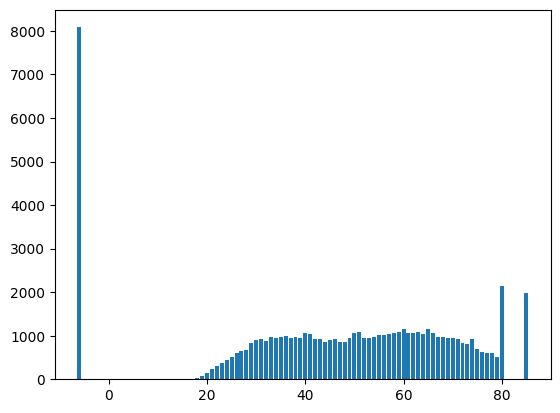

In [24]:
ages = data_set['HHAGE'].value_counts()
age_dict = ages.to_dict()
categories = age_dict.keys()
values = age_dict.values()
plt.bar(categories,values)

In [25]:
mean_age = data_set['HHAGE'].mean()
indices = data_set['HHAGE'] < 0

# Replace values less than 0 with the mean age
data_set.loc[indices, 'HHAGE'] = mean_age
data_set['HHAGE']

0        74.000000
1        55.000000
2        45.915888
3        80.000000
4        60.000000
           ...    
64136    45.915888
64137    44.000000
64138    45.915888
64139    23.000000
64140    27.000000
Name: HHAGE, Length: 64141, dtype: float64

In [26]:
data_set['HHAGE'].value_counts()

HHAGE
45.915888    8083
80.000000    2140
85.000000    1983
65.000000    1151
60.000000    1148
             ... 
19.000000      86
18.000000      32
17.000000       5
15.000000       5
16.000000       4
Name: count, Length: 68, dtype: int64

#KIDS

In [27]:
data_set['HHOLDKIDS']

0        0
1        0
2       -6
3        0
4        0
        ..
64136   -6
64137    0
64138   -6
64139    0
64140    0
Name: HHOLDKIDS, Length: 64141, dtype: int64

In [28]:
data_set['HHOLDKIDS'].value_counts()

HHOLDKIDS
 0     44377
-6      8083
 1      6079
 2      4002
 3      1191
 4       310
 5        76
 6        18
 8         2
 7         2
 15        1
Name: count, dtype: int64

<Axes: xlabel='HHOLDKIDS', ylabel='Count'>

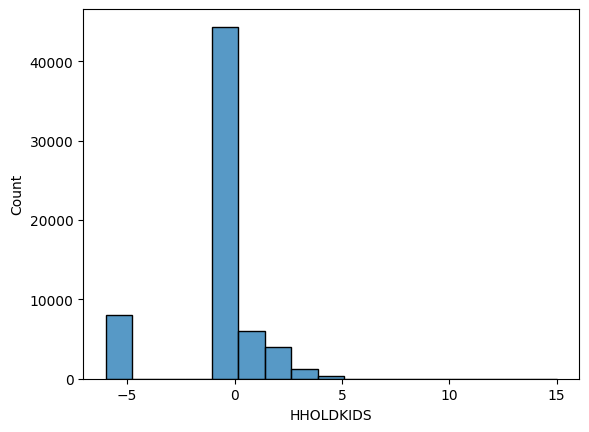

In [29]:
sns.histplot(data_set['HHOLDKIDS'])

#Info on race

In [30]:
data_set['HHRACE'].value_counts()

HHRACE
 1     40968
 2      9626
-6      8083
 4      3691
 3       650
 7       303
 6       221
 5       213
 8       157
 10       83
 15       44
 11       21
 14       20
 9        18
 20       15
 18       11
 16        7
 13        4
 12        3
 17        2
 19        1
Name: count, dtype: int64

<Axes: xlabel='HHRACE', ylabel='Count'>

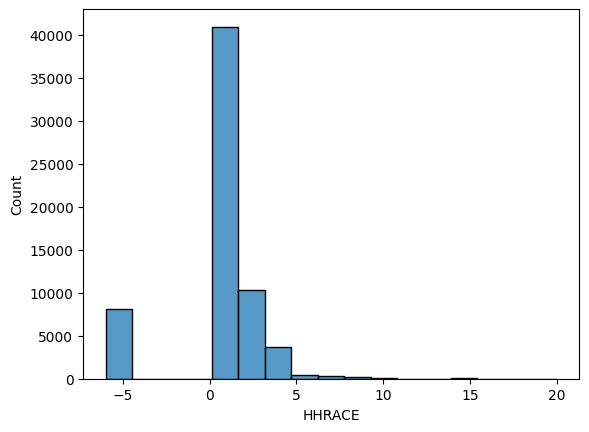

In [31]:
sns.histplot(data_set['HHRACE'])

#Identifying people who moved in the last 2 years

<Axes: xlabel='RMHOOD', ylabel='Count'>

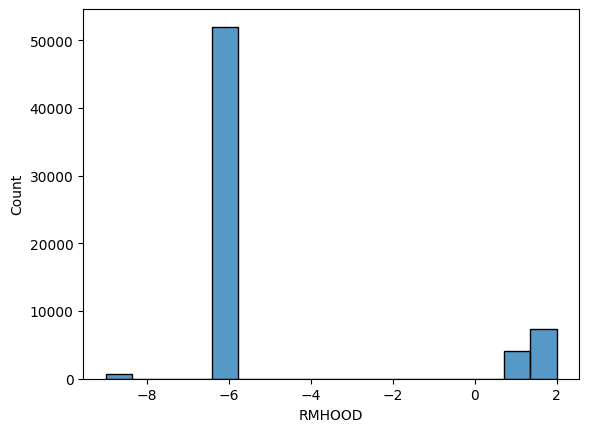

In [37]:
sns.histplot(merged_dataset['RMHOOD'])

In [33]:
yeses =  4132
nos = 7296
total_resp = yeses + nos
percent_of_yes = (yeses/total_resp)*100
percent_of_nos = (nos/total_resp)*100
print(f"Yes: {percent_of_yes}%, No: {percent_of_nos}%")


Yes: 36.15680784039202%, No: 63.84319215960797%


In [ ]:
s

#More Data Visualization

In [34]:
data_set2['VACANCY']

0        -6
1        -6
2        10
3        -6
4        -6
         ..
64136    10
64137    -6
64138     3
64139    -6
64140    -6
Name: VACANCY, Length: 64141, dtype: int64

<Axes: xlabel='VACANCY', ylabel='Count'>

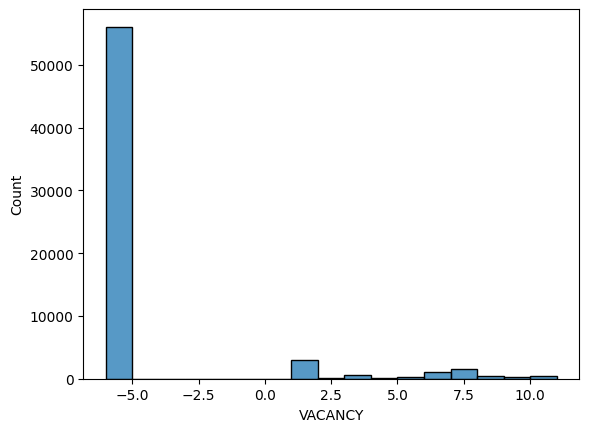

In [35]:
sns.histplot(data_set2['VACANCY'])